# Lab - Linear Regression with Normal equation

In [118]:
import numpy as np
import pandas as pd

In [119]:
class LinearRegression(object):
    def __init__(self, fit_intercept=True, copy_X=True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self._coef = None
        self._intercept = None
        self._new_X = None
    def fit(self, X, y):
        pass
    def predict(self, X):
        pass

In [209]:
df = pd.read_csv("./train.csv")
df.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [210]:
X = df["x"].values.reshape(-1,1)
y = df["y"].values

In [211]:
import sys
!{sys.executable} -m pip install sklearn

# model 생성

### - fit 함수

In [212]:
from sklearn import linear_model
import imp
imp.reload(linear_model)

<module 'sklearn.linear_model' from 'C:\\Users\\82106\\anaconda3\\envs\\why37\\lib\\site-packages\\sklearn\\linear_model\\__init__.py'>

In [213]:
lr = linear_model.LinearRegression(fit_intercept=True)

In [214]:
lr.fit(X, y)

LinearRegression()

In [215]:
lr.intercept_

-0.12015553181322502

In [216]:
lr.coef_

array([1.00077825])

In [217]:
lr.predict(X)[:10]

array([23.89852242, 49.91875687, 14.89151819, 37.9094179 , 86.94755205,
       35.9078614 , 11.88918345, 80.94288256, 24.89930067,  4.88373571])

# Model Validation

In [218]:
from sklearn import linear_model

In [219]:
sk_lr = linear_model.LinearRegression(normalize=False)
sk_lr.fit(X, y)

LinearRegression()

In [220]:
sk_lr.intercept_

-0.12015553181322502

In [221]:
sk_lr.coef_

array([1.00077825])

In [222]:
sk_lr.predict(X)[:10]

array([23.89852242, 49.91875687, 14.89151819, 37.9094179 , 86.94755205,
       35.9078614 , 11.88918345, 80.94288256, 24.89930067,  4.88373571])

In [223]:
np.isclose(lr.coef_, sk_lr.coef_)

array([ True])

In [224]:
df_test = pd.read_csv("./test.csv")
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [225]:
X_test = df["x"].values.reshape(-1,1)
lr.predict(X_test)[:5]

array([23.89852242, 49.91875687, 14.89151819, 37.9094179 , 86.94755205])

In [226]:
lr.predict(X_test)[:5]

array([23.89852242, 49.91875687, 14.89151819, 37.9094179 , 86.94755205])

In [227]:
sk_lr.predict(X_test)[:5]

array([23.89852242, 49.91875687, 14.89151819, 37.9094179 , 86.94755205])

# plot

In [228]:
raw_X = df['x'].values.reshape(-1, 1)
y = df['y'].values

In [229]:
raw_X[:5], y[:5]

(array([[24],
        [50],
        [15],
        [38],
        [87]], dtype=int64),
 array([21.54945196, 47.46446305, 17.21865634, 36.58639803, 87.28898389]))

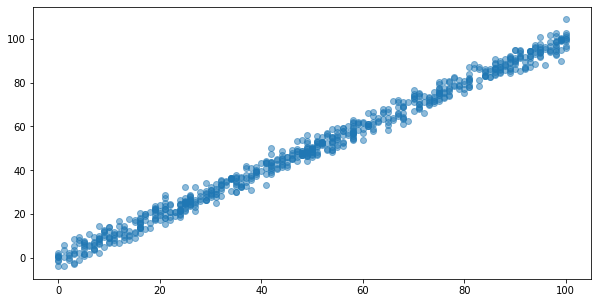

In [230]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(raw_X, y, 'o', alpha = 0.5)

In [231]:
X = np.concatenate((np.ones((len(raw_X), 1)), raw_X), axis = 1)
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [232]:
y1 = y.copy()

In [233]:
y1 = y1.reshape(2,-1)
y1.shape

(2, 350)

In [234]:
X_new_b.shape

(2, 2)

In [235]:
# np.linalg를 통해 정규방적식 계산
theta_best = np.linalg.inv(X_new_b.T.dot(X_new_b)).dot(X_new_b.T).dot(y1)

In [249]:
theta_best

array([[ 21.54945196,  47.46446305,  17.21865634,  36.58639803,
         87.28898389,  32.46387493,  10.78089683,  80.7633986 ,
         24.61215147,   6.96331907,  11.23757338,  13.53290206,
         24.60323899,  39.40049976,  48.43753838,  61.69900319,
         26.92832418,  70.4052055 ,  29.34092408,  25.30895192,
         69.02934339,  84.99484703,  57.04310305,  50.5921991 ,
         83.02772202,  57.05752706,  47.95883341,  24.34226432,
         94.68488281,  48.03970696,   7.08132338,  21.99239907,
         42.33151664,   0.32908944,  61.92303698,  91.17716423,
         39.45358014,   5.99606961,  22.59015942,  61.18044414,
         85.02778957,  -1.28631089,  61.94273962,  21.96033347,
         33.66194193,  17.60946242,  58.5630564 ,  52.82390762,
         22.1363481 ,  35.07467353,  86.18822311,  42.63227697,
          4.09817744,  61.2229864 ,  17.70677576,  11.85312574,
         80.23051695,  62.64931741,   9.6168598 ,  20.02797699,
         61.7510743 ,  71.61010303,  23.

In [250]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [251]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 21.54945196,  47.46446305,  17.21865634,  36.58639803,
         87.28898389,  32.46387493,  10.78089683,  80.7633986 ,
         24.61215147,   6.96331907,  11.23757338,  13.53290206,
         24.60323899,  39.40049976,  48.43753838,  61.69900319,
         26.92832418,  70.4052055 ,  29.34092408,  25.30895192,
         69.02934339,  84.99484703,  57.04310305,  50.5921991 ,
         83.02772202,  57.05752706,  47.95883341,  24.34226432,
         94.68488281,  48.03970696,   7.08132338,  21.99239907,
         42.33151664,   0.32908944,  61.92303698,  91.17716423,
         39.45358014,   5.99606961,  22.59015942,  61.18044414,
         85.02778957,  -1.28631089,  61.94273962,  21.96033347,
         33.66194193,  17.60946242,  58.5630564 ,  52.82390762,
         22.1363481 ,  35.07467353,  86.18822311,  42.63227697,
          4.09817744,  61.2229864 ,  17.70677576,  11.85312574,
         80.23051695,  62.64931741,   9.6168598 ,  20.02797699,
         61.7510743 ,  71.61010303,  23.

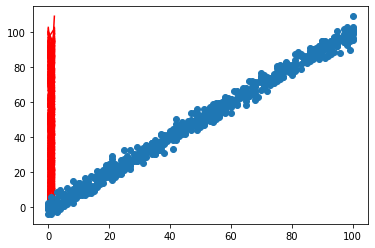

In [252]:
plt.plot(X_new, y_predict, "r-")
plt.plot(raw_X, y, "o")
# plt.axis([0,2,0,15])
plt.show()

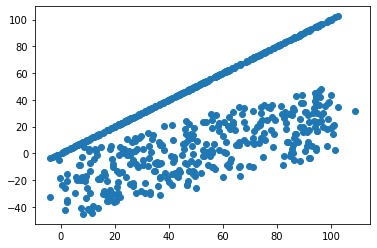

In [253]:
plt.scatter(y, theta_best)
plt.show()

# Multiple variable

### - Linear Regression with Normal equation

#### 1)

In [254]:
df = pd.read_csv("./mlr09.csv")
df.head()

,height_in_feet,weight_in_pounds,successful_field_goals,percent_of_successful_free_throws,average_points_scored
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [255]:
y = df["average_points_scored"].values
X = df.iloc[:,:-1].values

# RESCALED

In [256]:
mu_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

In [257]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [258]:
print(theta_best)

[-3.04634035e+00  4.47411947e-03  4.82210324e+01  1.24703504e+01]


In [259]:
theta_best.shape

(4,)

In [164]:
y.shape

(54,)

In [162]:
theta_best = theta_best.reshape(-1,1)

In [85]:
y = y.reshape(-1,1)

In [ ]:
lr.fit(theta_best, y)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
sk_lr.fit(y_predict, y)

In [ ]:
sk_lr.coef_

In [ ]:
sk_lr.intercept_

#### 2)

In [260]:
df = pd.read_csv("./mlr09.csv")
df.head()

,height_in_feet,weight_in_pounds,successful_field_goals,percent_of_successful_free_throws,average_points_scored
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [261]:
X = df.iloc[:,:-1].values
y = df["average_points_scored"].values

In [262]:
from sklearn.linear_model import  LinearRegression
lr_ne = LinearRegression(fit_intercept=True)

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [264]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [265]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [266]:
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse

6.758915758097025

In [267]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

45.68294222505229

Text(0.5, 1.0, '$Y_i$ vs $\\hat{Y}_i$')

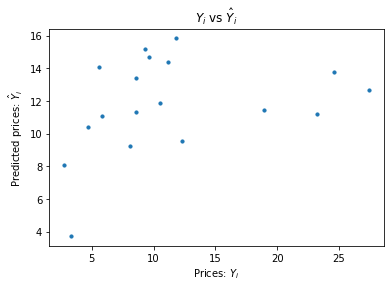

In [268]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("$Y_i$ vs $\hat{Y}_i$")

In [269]:
lr_ne.coef_

array([-5.86830444e+00,  1.79466515e-02,  4.83185003e+01,  7.86009101e+00])

In [270]:
lr_ne.intercept_

19.255108403121575

In [271]:
y

array([ 9.2, 11.7, 15.8,  8.6, 23.2, 27.4,  9.3, 16. ,  4.7, 12.5, 20.1,
        9.1,  8.1,  8.6, 20.3, 25. , 19.2,  3.3, 11.2, 10.5, 10.1,  7.2,
       13.6,  9. , 24.6, 12.6,  5.6,  8.7,  7.7, 24.1, 11.7,  7.7,  9.6,
        7.2, 12.3,  8.9, 13.6, 11.2,  2.8,  3.2,  9.4, 11.9, 15.4,  7.4,
       18.9,  7.9, 12.2, 11. ,  2.8, 11.8, 17.1, 11.6,  5.8,  8.3])

In [272]:
sk_lr.coef_

array([1.00077825])

In [273]:
sk_lr.intercept_

-0.12015553181322502